# Sales prediction using EDA 
We are going to use the Kaggle [Predict Future Sales](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/overview) dataset. 


This challenge serves as final project for the "How to win a data science competition" Coursera course.

In this competition you will work with a challenging time-series dataset consisting of daily sales data, kindly provided by one of the largest Russian software firms - 1C Company. 

We are asking you to predict total sales for every product and store in the next month. By solving this competition you will be able to apply and enhance your data science skill

##Load data from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Ignacio Malpartida - DS and ML/Data Science /Kaggle sales prediction/Dataset'
%ls

/content/drive/MyDrive/Ignacio Malpartida - DS and ML/Data Science /Kaggle sales prediction/Dataset
item_categories.csv  sales_train.csv        shops.csv
items.csv            sample_submission.csv  test.csv


##Import all the libraries

In [ ]:
#Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots

#Statsmodel and ML
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In this section we will read all the files needed for the analysis

In [ ]:
#Files direction to extract the data
dir_pandas = '/content/drive/MyDrive/Ignacio Malpartida - DS and ML/Data Science /Kaggle sales prediction/Dataset/{}'
#We read each CSV
item_categories = pd.read_csv(dir_pandas.format('item_categories.csv'))
items = pd.read_csv(dir_pandas.format('items.csv'))
sales_train = pd.read_csv(dir_pandas.format('sales_train.csv'))
sample_submission = pd.read_csv(dir_pandas.format('sample_submission.csv'))
shops = pd.read_csv(dir_pandas.format('shops.csv'))
test = pd.read_csv(dir_pandas.format('test.csv'))

In the following section we will define some useful functions for answering all the necessary questions about the data

##Explore data

In this section we are going to visualize each portion of the data to have a better understanding

In [ ]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [ ]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


##Pre processing

We will create another features and convert the data types required for this analysis 

In [ ]:
#We will start merging some files to start answering the questions
sales_train_dtypes = sales_train.copy(deep=True)
items_copy = items.copy(deep=True)
sales_train_dtypes = pd.merge(sales_train_dtypes, items_copy, on='item_id',)
sales_train_dtypes.drop(labels=['item_name'], axis=1, inplace=True)
sales_train_dtypes.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,37
1,23.01.2013,0,24,22154,999.0,1.0,37
2,20.01.2013,0,27,22154,999.0,1.0,37
3,02.01.2013,0,25,22154,999.0,1.0,37
4,03.01.2013,0,25,22154,999.0,1.0,37


In [ ]:
#We manipulate the date a little bit
sales_train_dtypes['date'] = pd.to_datetime(sales_train_dtypes['date'], format = '%d.%m.%Y')
sales_train_dtypes['month'] = pd.DatetimeIndex(sales_train_dtypes['date']).month
sales_train_dtypes['day'] = pd.DatetimeIndex(sales_train_dtypes['date']).dayofweek #Monday:0 and Sunday:6

# We are going to sort by date
sales_train_dtypes = sales_train_dtypes.sort_values(by = 'date', axis = 0, ascending=True)
sales_train_dtypes

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,month,day
400417,2013-01-01,0,51,6622,347.00,1.0,30,1,1
130157,2013-01-01,0,7,1524,2999.00,1.0,29,1,1
867737,2013-01-01,0,19,18721,149.00,1.0,40,1,1
1004082,2013-01-01,0,54,15133,170.00,1.0,67,1,1
1004086,2013-01-01,0,41,15133,170.00,1.0,67,1,1
...,...,...,...,...,...,...,...,...,...
1788495,2015-10-31,33,58,3734,3399.00,1.0,23,10,5
2715396,2015-10-31,33,58,17748,288.15,1.0,70,10,5
1502745,2015-10-31,33,26,20949,5.00,3.0,71,10,5
2931438,2015-10-31,33,46,7223,3999.00,1.0,20,10,5


##Start answering 

We are going to answer some BI questions, it will be useful for us to create those insight and to measure busjness health 

### Which categories are the most selled?

In this section we will answer which categories generate more revenue and the one that sell more items. First of all we will create a groupby to start sorting and create both dataframes


*   category_money_best
*   category_best_selled



In [ ]:
category_best_selled = sales_train_dtypes.groupby(['item_category_id'])['item_cnt_day','item_price'].agg({'item_cnt_day':'sum', 'item_price':'sum'})
category_money_best =  category_best_selled.sort_values(by = 'item_price', axis = 0, ascending=False)
category_best_selled = category_best_selled.sort_values(by = 'item_cnt_day', axis = 0, ascending=False)
#Reseting indexes for plotting, selecting the top 10
category_best_selled = category_best_selled.iloc[:10].reset_index()
category_money_best = category_money_best.iloc[:10].reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


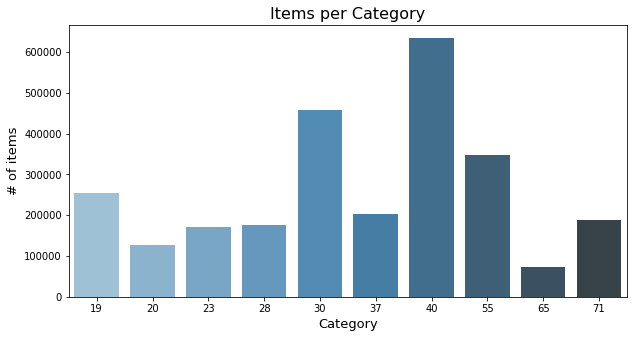

In [ ]:
# We are going to create the first graphic telling us which categories make the most selled items
plt.figure(figsize=(10,5))
ax = sns.barplot(x="item_category_id", y="item_cnt_day", data = category_best_selled, palette='Blues_d')
plt.title("Items per Category", fontsize = 16)
plt.ylabel('# of items', fontsize=13)
plt.xlabel('Category', fontsize=13)
plt.show()

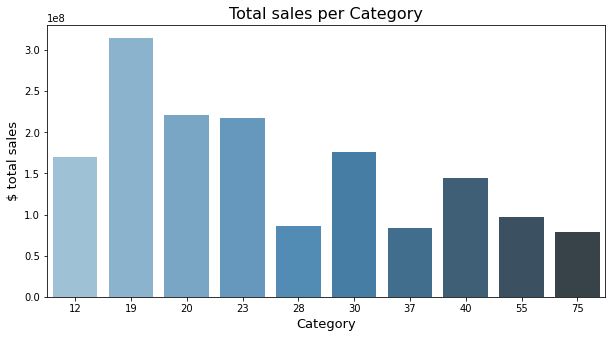

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="item_category_id", y="item_price", data = category_money_best, palette='Blues_d')
plt.title("Total sales per Category", fontsize = 16)
plt.ylabel('$ total sales', fontsize=13)
plt.xlabel('Category', fontsize=13)
plt.show()

### Which articles are the most selled?

In this section we will answer which articles generate more revenue and the one that are sold the most. First of all we will create a groupby to start sorting and create both dataframes


*   category_money_best
*   category_best_selled



In [ ]:
items_best_selled = sales_train_dtypes.groupby(['item_id'])['item_cnt_day','item_price'].agg({'item_cnt_day':'sum', 'item_price':'sum'})
items_money_best =  items_best_selled.sort_values(by = 'item_price', axis = 0, ascending=False)
items_best_selled = items_best_selled.sort_values(by = 'item_cnt_day', axis = 0, ascending=False)
#Reseting indexes for plotting, selecting the top 10
items_best_selled = items_best_selled.iloc[:10].reset_index()
items_money_best = items_money_best.iloc[:10].reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
items_best_selled

,item_id,item_cnt_day,item_price
0,20949,187642.0,1.540316e+05
1,2808,17245.0,7.475887e+06
2,3732,16642.0,1.756505e+07
3,17717,15830.0,9.924972e+06
4,5822,14515.0,9.984311e+06
5,3734,11688.0,1.589006e+07
6,6675,10289.0,1.132643e+08
7,3731,10099.0,4.829843e+06
8,1855,10032.0,5.239126e+06
9,16787,9227.0,1.203159e+07


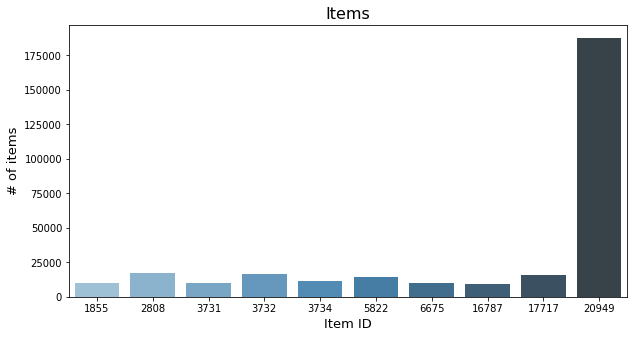

In [ ]:
# We are going to create the first graphic telling us which categories make the most selled items
plt.figure(figsize=(10,5))
ax = sns.barplot(x='item_id', y='item_cnt_day', data = items_best_selled, palette='Blues_d')
plt.title("Items", fontsize = 16)
plt.ylabel('# of items', fontsize=13)
plt.xlabel('Item ID', fontsize=13)
plt.show()

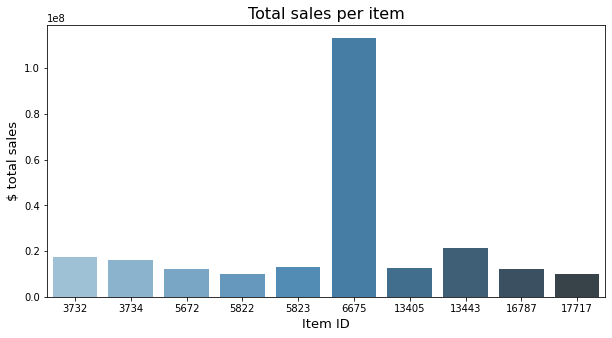

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="item_id", y="item_price", data = items_money_best, palette='Blues_d')
plt.title("Total sales per item", fontsize = 16)
plt.ylabel('$ total sales', fontsize=13)
plt.xlabel('Item ID', fontsize=13)
plt.show()

### Which stores sell the most?

In this section we will answer which stores generate more revenue and which one sell more items



In [ ]:
stores_best_selled = sales_train_dtypes.groupby(['shop_id'])['item_cnt_day','item_price'].agg({'item_cnt_day':'sum', 'item_price':'sum'})
stores_money_best =  stores_best_selled.sort_values(by = 'item_price', axis = 0, ascending=False)
stores_best_selled = stores_best_selled.sort_values(by = 'item_cnt_day', axis = 0, ascending=False)
#Reseting indexes for plotting, selecting the top 10
stores_best_selled = stores_best_selled.iloc[:10].reset_index()
stores_money_best = stores_money_best.iloc[:10].reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


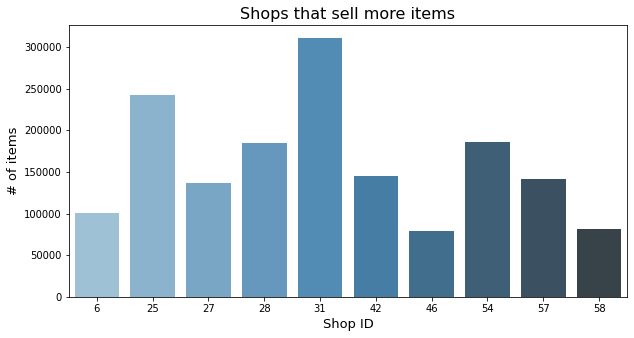

In [ ]:
# We are going to create the first graphic telling us which categories make the most selled items
plt.figure(figsize=(10,5))
ax = sns.barplot(x='shop_id', y='item_cnt_day', data = stores_best_selled, palette='Blues_d')
plt.title("Shops that sell more items", fontsize = 16)
plt.ylabel('# of items', fontsize=13)
plt.xlabel('Shop ID', fontsize=13)
plt.show()

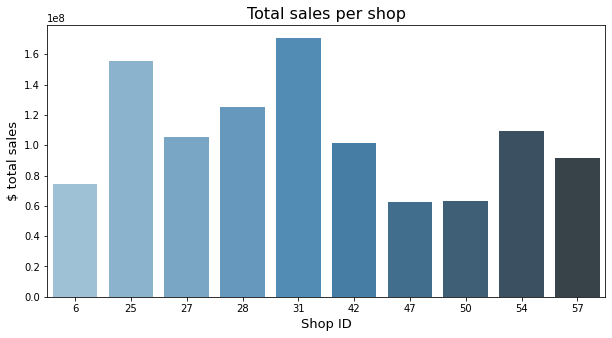

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="shop_id", y="item_price", data = stores_money_best, palette='Blues_d')
plt.title("Total sales per shop", fontsize = 16)
plt.ylabel('$ total sales', fontsize=13)
plt.xlabel('Shop ID', fontsize=13)
plt.show()

### Month and sales impact 
In this section we will answer how seasonality affects the business. This is our first step on predicting the future sales

*   Search for seasonality 
*   Which months are the most best for selling
*   Which months are the worst best for selling
*   Which articles are the most selled per month









In [ ]:
ts=sales_train_dtypes.groupby(["date_block_num"])['item_cnt_day','item_price'].agg({'item_cnt_day':'sum', 'item_price':'sum'})
ts.reset_index().head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,date_block_num,item_cnt_day,item_price
0,0,131479.0,8.221187e+07
1,1,128090.0,7.558019e+07
2,2,147142.0,8.429831e+07
3,3,107190.0,6.151282e+07
4,4,106970.0,5.727413e+07


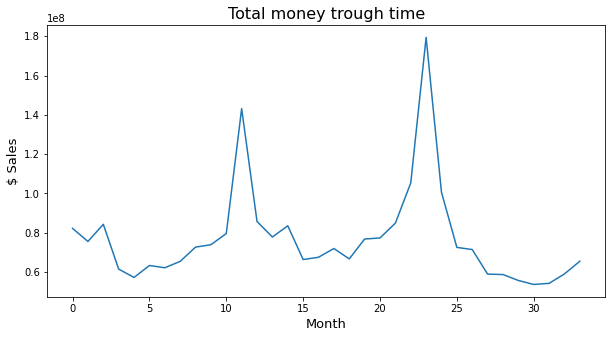

In [ ]:
#Visualization of $ sales in the whole dataset
plt.figure(figsize=(10,5))
sns.lineplot(data=ts, x="date_block_num", y="item_price", palette='Blues_d')
plt.title("Total money trough time", fontsize = 16)
plt.ylabel('$ Sales', fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.show()

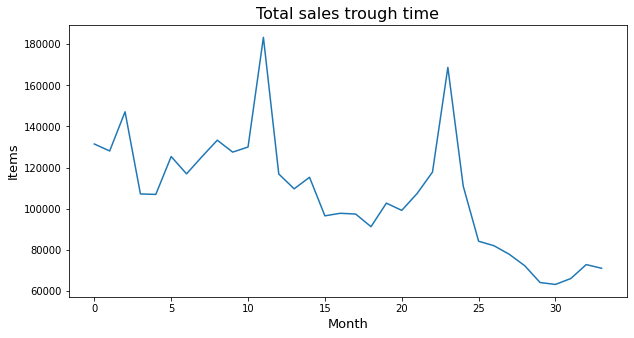

In [ ]:
#Visualization of sales in the whole dataset, this is the variable we will predict
plt.figure(figsize=(10,5))
sns.lineplot(data=ts, x="date_block_num", y="item_cnt_day", palette='Blues_d')
plt.title("Total sales trough time", fontsize = 16)
plt.ylabel('Items', fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.show()

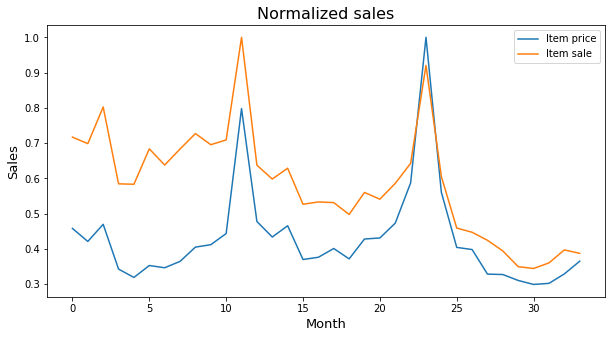

In [ ]:
#Normalizing and plotting both graphs
#Normalize
ts['normal_item_price'] = ts['item_price']/ts['item_price'].max()
ts['normal_item_cnt_day'] = ts['item_cnt_day']/ts['item_cnt_day'].max()
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts['normal_item_price'], label = "Item price")
plt.plot(ts.index, ts['normal_item_cnt_day'], label = "Item sale")
plt.title("Normalized sales", fontsize = 16)
plt.ylabel('Sales', fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.legend()
plt.show()

In [ ]:
"""
In the case we wanted to plot all three levels we do some modifications using pd.melt()

plt.figure(figsize=(10,5))
sns.lineplot(x='date_block_num', y='value', hue='level_1', 
             data=pd.melt(aux, ['date_block_num']))

We have a another example, with another data, here:

num_rows = 20
years = list(range(1990, 1990 + num_rows))
data_preproc = pd.DataFrame({
    'Year': years, 
    'A': np.random.randn(num_rows).cumsum(),
    'B': np.random.randn(num_rows).cumsum(),
    'C': np.random.randn(num_rows).cumsum(),
    'D': np.random.randn(num_rows).cumsum()})
sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Year']))

"""

"\nIn the case we wanted to plot all three levels we do some modifications using pd.melt()\n\nplt.figure(figsize=(10,5))\nsns.lineplot(x='date_block_num', y='value', hue='level_1', \n             data=pd.melt(aux, ['date_block_num']))\n\nWe have a another example, with another data, here:\n\nnum_rows = 20\nyears = list(range(1990, 1990 + num_rows))\ndata_preproc = pd.DataFrame({\n    'Year': years, \n    'A': np.random.randn(num_rows).cumsum(),\n    'B': np.random.randn(num_rows).cumsum(),\n    'C': np.random.randn(num_rows).cumsum(),\n    'D': np.random.randn(num_rows).cumsum()})\nsns.lineplot(x='Year', y='value', hue='variable', \n             data=pd.melt(data_preproc, ['Year']))\n\n"

####Trend + Seasonality + Residual

**Trend** =  a general systematic linear or (most often) nonlinear component that changes over time and does not repeat

**Seasonality** = a general systematic linear or (most often) nonlinear component that changes over time and does repeat

**Residual** = the difference between the observed value and the mean value that the model predicts for that observation

<Figure size 1152x1152 with 0 Axes>

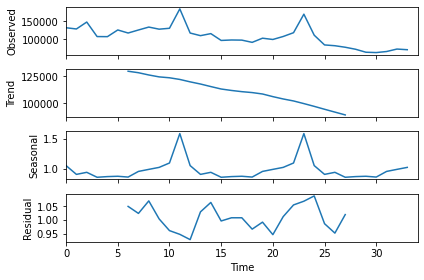

In [ ]:
#We will create a summary of all the possible analysis
analysis = sm.tsa.seasonal_decompose(ts['item_cnt_day'].to_list(), freq= 12, model = 'multiplicative')
plt.figure(figsize=(16,16))
plot = analysis.plot()

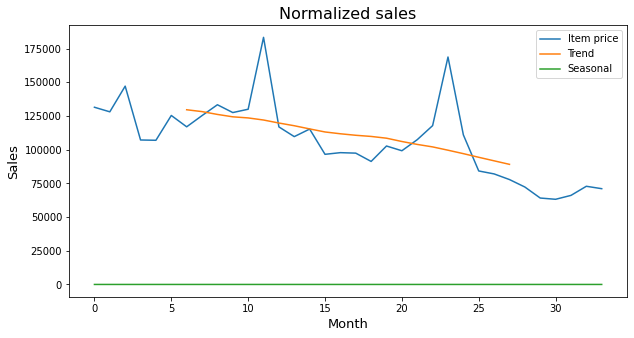

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts['item_cnt_day'], label = "Item price")
plt.plot(ts.index, analysis.trend, label = "Trend")
plt.plot(ts.index, analysis.seasonal, label = "Seasonal")
plt.title("Summary of analysis", fontsize = 16)
plt.ylabel('Sales', fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.legend()
plt.show()

####Stationarity

A stationary process has the property that **the mean, variance and autocorrelation structure do not change over time**. Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations

"In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time"


![example](https://miro.medium.com/max/780/0*3XXCQed3bPHrD1lt.png)

[Here](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322) is a clear reference on how to understand stationarity

<Figure size 1152x1152 with 0 Axes>

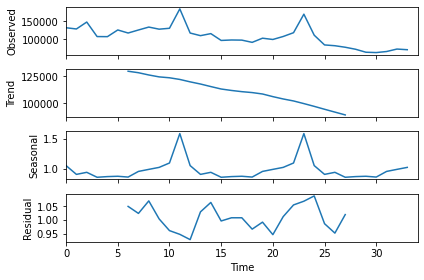

In [ ]:
#We will create a summary of all the possible analysis
analysis = sm.tsa.seasonal_decompose(ts['item_cnt_day'].to_list(), freq= 12, model = 'multiplicative')
plt.figure(figsize=(16,16))
plot = analysis.plot()

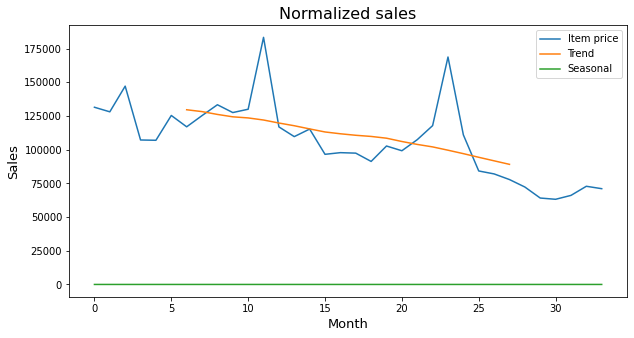

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts['item_cnt_day'], label = "Item price")
plt.plot(ts.index, analysis.trend, label = "Trend")
plt.plot(ts.index, analysis.seasonal, label = "Seasonal")
plt.title("Summary of analysis", fontsize = 16)
plt.ylabel('Sales', fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.legend()
plt.show()

## Translation

We are going to manipulate a little bit the data frame to have the data in English insetead of Russian

In [ ]:
!pip install -U deep-translator

In [ ]:
from deep_translator import (GoogleTranslator,
                             MicrosoftTranslator,
                             PonsTranslator,
                             LingueeTranslator,
                             MyMemoryTranslator,
                             YandexTranslator,
                             PapagoTranslator,
                             DeepL,
                             QCRI,
                             single_detection,
                             batch_detection)

In [ ]:
unique_categories = visualization_ds['item_category_name'].unique()
unique_names = visualization_ds['item_name'].unique()
unique_shops = visualization_ds['shop_name'].unique()
en_unique_categories = translation_en (unique_categories)
en_unique_name = translation_en (unique_names)
en_unique_shops = translation_en (unique_shops)

We use the power of Google translate API